In [1]:
# 쥬피터노트북 셀 스타일 조절 
from IPython.core.display import display, HTML
display(HTML("<style>.container { font-weight: bold !important; }</style>"))
display(HTML("<style>.container { width: 100% !important; }</style>"))

# 경고 메세지 숨기기 
import warnings
warnings.filterwarnings(action='ignore')

# Seaborn

- Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
- https://seaborn.github.io/
- http://seaborn.pydata.org/

# 관련 모듈 임포트 

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
sns.__version__

'0.11.1'

In [4]:
print(dir(sns))

['FacetGrid', 'JointGrid', 'PairGrid', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_core', '_decorators', '_docstrings', '_orig_rc_params', '_statistics', 'algorithms', 'axes_style', 'axisgrid', 'barplot', 'blend_palette', 'boxenplot', 'boxplot', 'categorical', 'catplot', 'choose_colorbrewer_palette', 'choose_cubehelix_palette', 'choose_dark_palette', 'choose_diverging_palette', 'choose_light_palette', 'clustermap', 'cm', 'color_palette', 'colors', 'countplot', 'crayon_palette', 'crayons', 'cubehelix_palette', 'dark_palette', 'desaturate', 'despine', 'displot', 'distplot', 'distributions', 'diverging_palette', 'dogplot', 'ecdfplot', 'external', 'factorplot', 'get_data_home', 'get_dataset_names', 'heatmap', 'histplot', 'hls_palette', 'husl_palette', 'jointplot', 'kdeplot', 'light_palette', 'lineplot', 'lmplot', 'load_dataset', 'matrix', 'miscplot', 'mpl', 'mpl_palette', 'pairplot', 'palettes', 'pal

# sns.load_dataset?
https://github.com/mwaskom/seaborn-data

# seaborn 라이브러리의 tips 데이타셋 로딩

- 데이타프레임변수 = sns.load_dataset('tips')
- 레스토랑의 팁을 지불한 손님의 정보를 모아둔것 
- 지불금액, 팁, 성별, 흡연유무, 요일, 시간, 전체인원 으로 컬럼 구성

In [7]:
# seaborn 라이브러리에서 제공하는 데이타셋 목록 확인 
# sns.get_dataset_names()

In [8]:
tips = sns.load_dataset("tips")
tips.shape

(244, 7)

In [9]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [10]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [11]:
tips['sex'].unique(), tips['smoker'].unique(), tips['day'].unique(), tips['time'].unique()

(['Female', 'Male']
 Categories (2, object): ['Female', 'Male'],
 ['No', 'Yes']
 Categories (2, object): ['No', 'Yes'],
 ['Sun', 'Sat', 'Thur', 'Fri']
 Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri'],
 ['Dinner', 'Lunch']
 Categories (2, object): ['Dinner', 'Lunch'])

In [12]:
# 결측치 확인 
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# sns.histplot()

- sns.그래프명(x=컬럼명1, y=컬럼명2, data=데이타프레임, 옵션)

예) sns.histplot(x='tip', data=tips)

In [13]:
tips['tip']

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

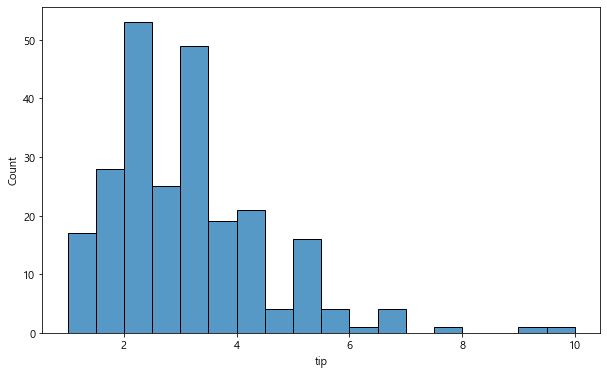

In [17]:
sns.histplot(x='tip', data=tips);
# sns.histplot(tips['tip']); 

In [19]:
sns.histplot?

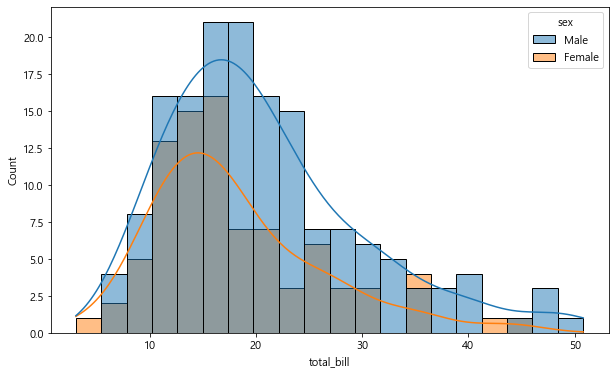

In [20]:
# hue 값은 카테고리형 컬럼명 
sns.histplot(x='total_bill', data=tips, bins=20, hue='sex', kde=True);

In [21]:
tips['smoker'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

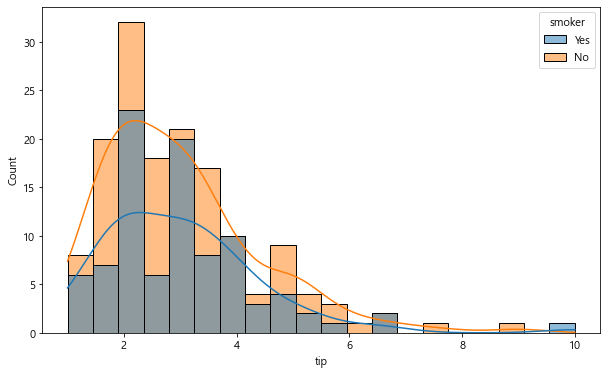

In [23]:
sns.histplot(x='tip', data=tips, bins=20, hue='smoker', kde=True);

In [25]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

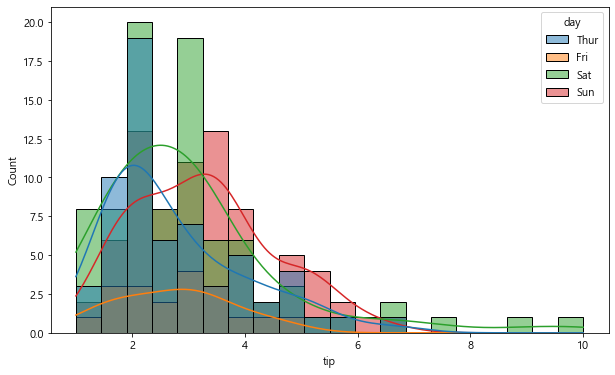

In [24]:
sns.histplot(x='tip', data=tips, bins=20, hue='day', kde=True);

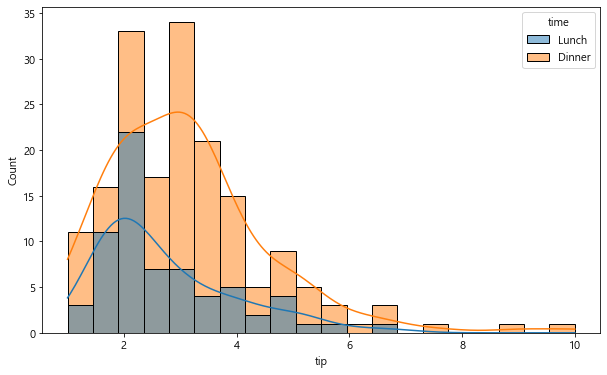

In [26]:
sns.histplot(x='tip', data=tips, bins=20, hue='time', kde=True);

## 서브플랏 스타일로 히스토그램 그래프 배치 

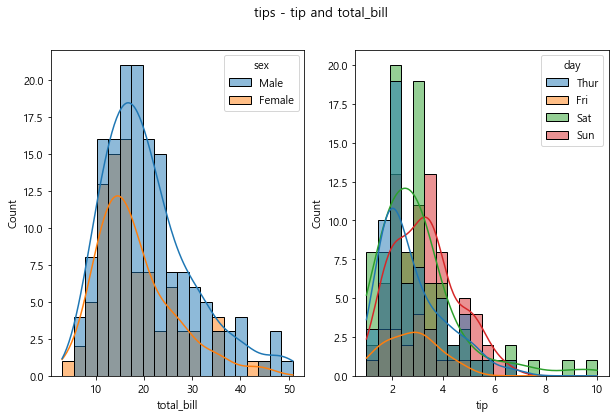

In [27]:
# 1행 2열로 배치 
# plt.subplot(12순서)

fig1 = plt.figure()

# 1행2열에서 첫번째 그래프 
plt.subplot(121)
sns.histplot(x='total_bill', data=tips, bins=20, hue='sex', kde=True);

# 1행2열에서 두번째 그래프 
plt.subplot(122)
sns.histplot(x='tip', data=tips, bins=20, hue='day', kde=True);

plt.suptitle('tips - tip and total_bill')
plt.show()

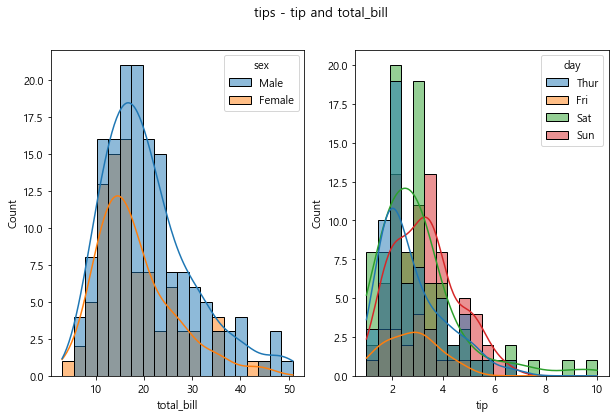

In [28]:
fig1

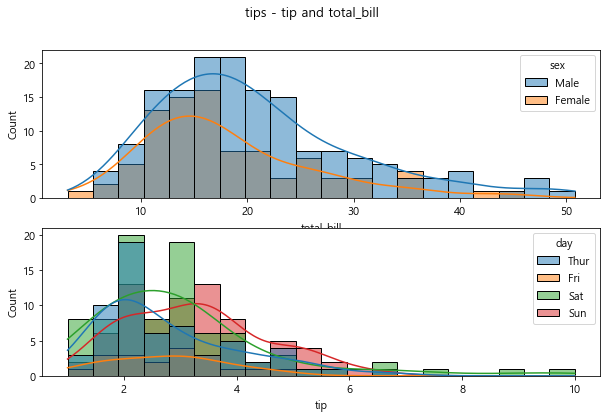

In [29]:
# 2행 1열로 배치 
# plt.subplot(21순서)

fig2 = plt.figure()

# 2행1열에서 첫번째 그래프 
plt.subplot(211)
sns.histplot(x='total_bill', data=tips, bins=20, hue='sex', kde=True);

# 2행1열에서 두번째 그래프 
plt.subplot(212)
sns.histplot(x='tip', data=tips, bins=20, hue='day', kde=True);

plt.suptitle('tips - tip and total_bill')

# 그래프 저장 
plt.savefig('output/tip_and_total_bill.png')

plt.show()

In [30]:
ls output\*.png

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2819-FF50

 C:\workspace211123\output 디렉터리

2021-12-01  오후 02:17            63,743 fig4.png
2021-12-02  오전 11:28            40,865 tip_and_total_bill.png
               2개 파일             104,608 바이트
               0개 디렉터리  66,116,784,128 바이트 남음


## tips 데이타프레임에서 'total_bill', 'tip', 'size'  컬럼값을 이용하여 히스토그램을 함께 출력하여라 

In [31]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


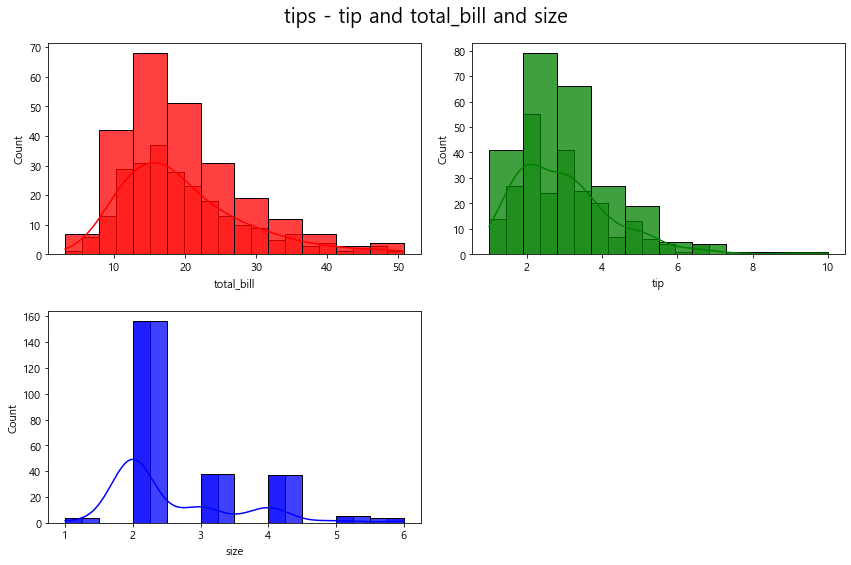

In [40]:
fig3 = plt.figure(figsize=(12, 8))

columns_list = ['total_bill', 'tip', 'size']
color_list = ['red', 'green', 'blue']

for i in range(3):
#     print(i)
    plt.subplot(221 + i)
#     sns.histplot(tips[columns_list[i]], bins=10, color=color_list[i])
    sns.histplot(x=columns_list[i], data=tips, bins=20, kde=True, color=color_list[i]);
    sns.histplot(tips[columns_list[i]], bins=10, color=color_list[i])
    
plt.suptitle('tips - tip and total_bill and size', fontsize=20)    
plt.tight_layout(pad=1.2, w_pad=1.5, h_pad=2.0)

# 그래프 저장 
plt.savefig('output/tip_and_total_bill_and_size.png')

plt.show()

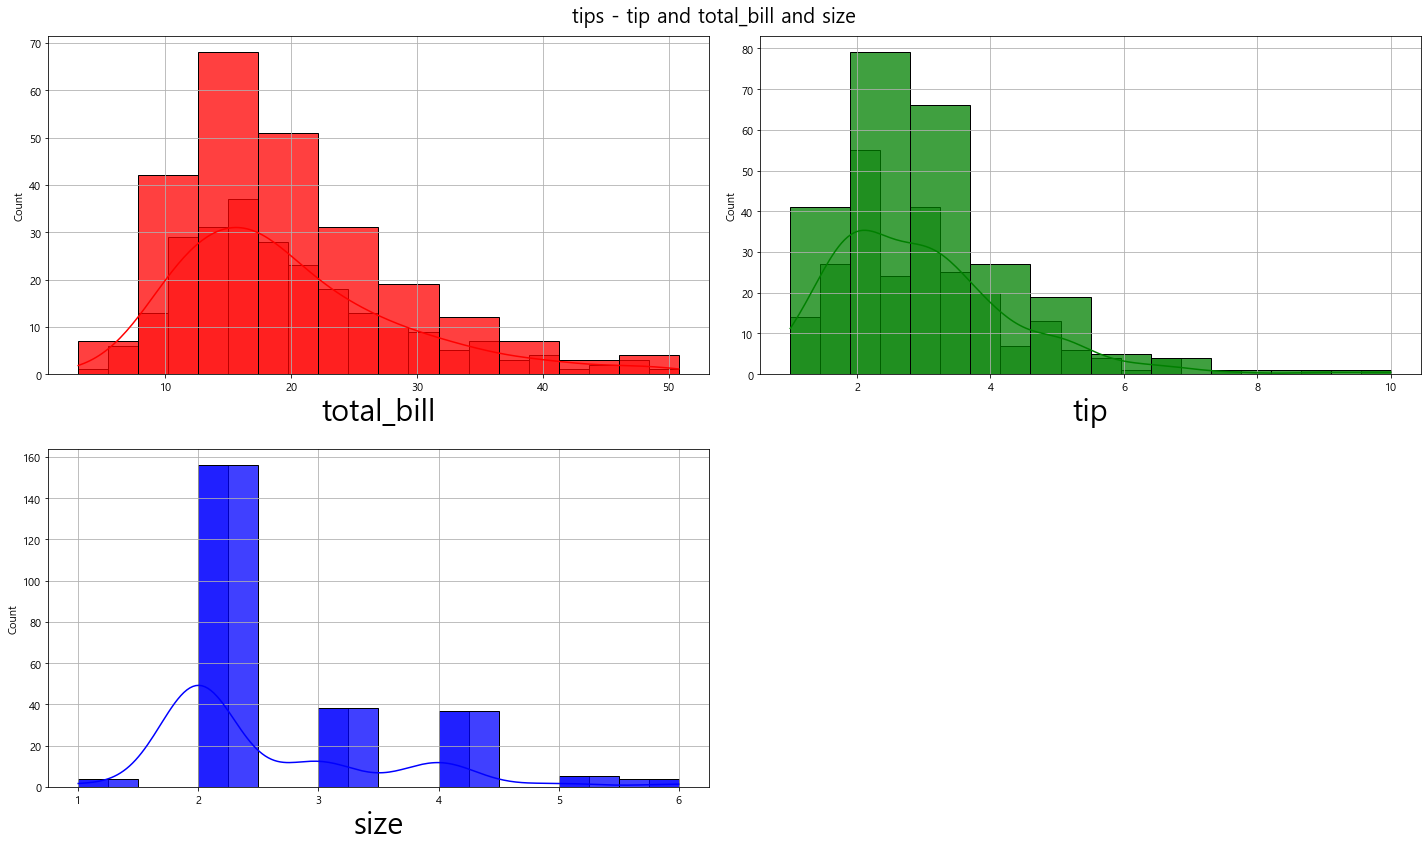

In [44]:
fig3 = plt.figure(figsize=(20, 12))

columns_list = ['total_bill', 'tip', 'size']
color_list = ['red', 'green', 'blue']

for i in range(3):
#     print(i)
    plt.subplot(221 + i)
#     sns.histplot(tips[columns_list[i]], bins=10, color=color_list[i])
    sns.histplot(x=columns_list[i], data=tips, bins=20, kde=True, color=color_list[i]);
    sns.histplot(tips[columns_list[i]], bins=10, color=color_list[i])
    plt.xlabel(columns_list[i], size=30)
    plt.grid()
    
plt.suptitle('tips - tip and total_bill and size', fontsize=20)    
plt.tight_layout(pad=1.2, w_pad=1.5, h_pad=2.0)

# 그래프 저장 
plt.savefig('output/tip_and_total_bill_and_size.png')

plt.show()

In [38]:
ls output\*.png

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2819-FF50

 C:\workspace211123\output 디렉터리

2021-12-01  오후 02:17            63,743 fig4.png
2021-12-02  오전 11:28            40,865 tip_and_total_bill.png
2021-12-02  오전 11:35            19,688 tip_and_total_bill_and_size.png
               3개 파일             124,296 바이트
               0개 디렉터리  66,117,320,704 바이트 남음


## plt.hist() , tips['total_bill'].plot(kind='hist' ), sns.histplot()

In [ ]:
plt.hist(tips['total_bill'], bins=20)

In [ ]:
tips['total_bill'].plot(kind='hist', bins=20 );

In [ ]:
sns.histplot(tips['total_bill'], bins=20)

# lineplot()

In [ ]:
xData = np.linspace(-5, 5, 1000)
yData = np.sin(xData)
sns.lineplot(x=xData, y=yData)

In [ ]:
sns.lineplot(x='tip', y='total_bill', data=tips)

In [ ]:
sns.lineplot?

Object `ax.set_xlabel` not found.


In [ ]:
ax = plt.subplots()
ax = sns.lineplot(x='tip', y='total_bill', data=tips)
ax.set_title('Tip and Total Bill')
ax.set_xlabel('Tip')
ax.set_ylabel('Total Bill')

# count 그래프 - Bar

In [ ]:
tips['day'].unique()

In [ ]:
ax = plt.subplots()
ax = sns.countplot('day', data=tips)
ax.set_title('count of days')
ax.set_xlabel('day of week')
ax.set_ylabel('Frequency')

# sns.regplot()

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fig, ax = plt.subplots()

ax = sns.regplot(x=smelt_length, y=smelt_weight, fit_reg=True)

ax.set_title('regplot 그래프')
ax.set_xlabel('smelt_length')
ax.set_ylabel('smelt_weight')

ax;

# joinplot 을 이용한 산점도+히스토그램

In [ ]:
sns.jointplot(x='total_bill', y='tip', data=tips)

In [ ]:
# ax = plt.subplots()
ax = sns.jointplot(x='total_bill', y='tip', data=tips)
ax.fig.suptitle('Joint Plot', fontsize=10, y=1.03)
ax.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
ax

In [ ]:
ax = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
ax.fig.suptitle('Joint Plot', fontsize=10, y=1.03)
ax.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
ax

### 바이올린 그래프 (violinplot)

In [ ]:
sns.violinplot(x='time', y='total_bill', data=tips)

In [ ]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('violin Plot of total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total bill')
ax

In [ ]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)
ax.set_title('violin Plot of total bill for time of day')
ax.set_xlabel('Time')
ax.set_ylabel('Total bill')
ax

## Bar 그래프 

In [ ]:
tips[['time','total_bill']].head()

In [ ]:
sns.barplot(x='time', y='total_bill', data=tips)

In [ ]:
ax = plt.subplots()
ax = sns.barplot(x='tip', y='day', data=tips, capsize=.2)
ax.set_title('Bar plot of Day and Tip') # 제목지정
ax.set_xlabel('Total Bill') # X축 제목
ax.set_ylabel('tip') # Y축 제목

# Boxplot 그래프

```
최솟값, 1분위수, 중간값, 3분위수, 최댓값, 이상치를 표시 
```

In [ ]:
tips[['time', 'total_bill']].tail()

In [ ]:
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of time and total_bill') # 제목지정
ax.set_xlabel('time') # X축 제목
ax.set_ylabel('total_bill') # Y축 제목

# 관계 그래프 


In [ ]:
pair_grid = sns.PairGrid(tips)
pair_grid.map(sns.regplot)
plt.show()

In [ ]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_diag(plt.hist, edgecolor="w")
pair_grid = pair_grid.map_offdiag(plt.scatter, edgecolor="b")
plt.show()

# 다른 데이타셋 이용하기 

In [ ]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
# tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

In [ ]:
titanic.head()

# 카운트플랏


In [ ]:
sns.countplot(x="class", data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

In [ ]:
sns.countplot(x="sex", data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

# pairplot


```
pairplot은 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그린다.

pairplot: http://seaborn.pydata.org/generated/seaborn.pairplot.html

```

In [ ]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.show()

## 히트맵(Heat Map)

- X축과 Y축에 2개의 범주형 자료값에 비례하여 색깔을 다르게 해서 2차원으로 자료를 시각화하는데 사용한다.
- sns.heatmap(data, op)

In [ ]:
data = np.random.rand(30,30)
data
sns.heatmap(data);

### flights 데이타셋 로딩

연도(year)별 월(month)별 승객 수(passengers)

데이타프레임변수 = sns.load_dataset('flights')

In [ ]:
flights = sns.load_dataset('flights')
flights.head()

In [ ]:
# year와 passengers 컬럼을 이용한 그래프 
sns.lineplot(x='year', y='passengers', data=flights, color='green');

In [ ]:
flights_pv = flights.pivot('month', 'year', 'passengers')
flights_pv

In [ ]:
# annot=True 값, 구분선 표시
sns.heatmap(flights_pv, annot=True, fmt='d', linewidths=.1)

In [ ]:
sns.heatmap(flights_pv, annot=True, fmt='d', linewidths=.1, 
            cmap='BuPu'
           )

### 그래프 스타일 지정

darkgrid, whitegrid, dark, white, ticks

sns.set_style(styleName)

In [ ]:
# shade=True
data = np.random.randn(200)
sns.kdeplot(data, shade=True);

In [ ]:
sns.set_style('whitegrid')
sns.kdeplot(data, shade=True);

In [ ]:
sns.set_style('dark')
sns.kdeplot(data, shade=True);